In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('./datasets/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


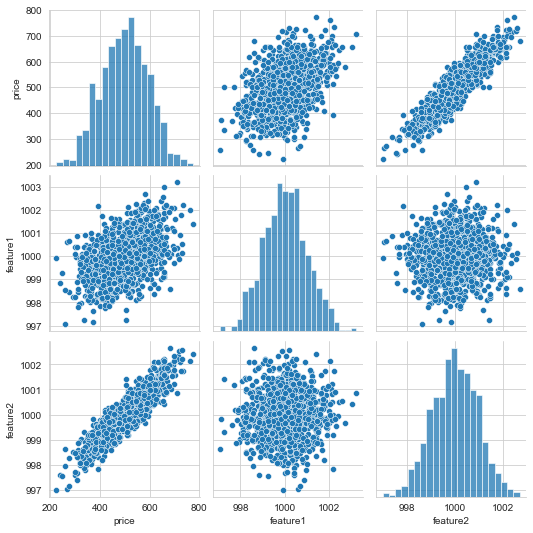

In [3]:
sns.pairplot(df)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X_train), len(X_test)

(700, 300)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train = scaler.transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
# help(Sequential)

In [14]:
# model = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1)])

In [17]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [27]:
model.fit(x=X_train, y=y_train, epochs=10000, verbose=0)

In [28]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

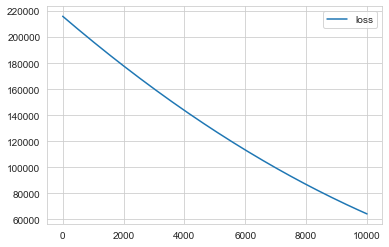

In [29]:
loss_df.plot()